In [36]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import numpy as np

# Ejercicio 1
### Para la siguiente ecuación diferencial

\begin{cases}
   x^{\prime}(t) = cos(t) - sin(x(t)) + t^2 \\
   x(-1) = 3
\end{cases}

### Resolver usando el método de Taylor de orden 4, con paso h = 0:01 , usar 200 puntos. Graficar la solución usando Splines Cúbicos.


### Se calculan las derivadas necesarias para la implementación

\begin{cases}
   x^{\prime}(t) = cos(t) - sin(x(t)) + t^2 \\
   x^{\prime\prime}(t) = -sin(t) - x^{\prime}(t) \cdot cos(x(t)) + 2t \\
   x^{\prime\prime\prime}(t) = -cos(t) - x^{\prime\prime}(t) \cdot cos(x(t)) + x^{\prime}(t)^2 \cdot sin(x(t)) + 2 \\
   x^{\prime\prime\prime\prime}(t) = sin(t) + (x^{\prime}(t)^3 - x^{\prime\prime\prime}(t)) \cdot cos(x(t)) + 3 \cdot x^{\prime}(t) \cdot x^{\prime\prime}(t) \cdot sin(x(t))
\end{cases}

### Se define entonces la función de Taylor

$$ f(x, h) = x + h \cdot ( x^{\prime}(t) + \frac{h}{2} \cdot  x^{\prime\prime}(t) + \frac{h}{3} \cdot x^{\prime\prime\prime}(t) + \frac{h}{4} \cdot x^{\prime\prime\prime\prime}(t) ) $$


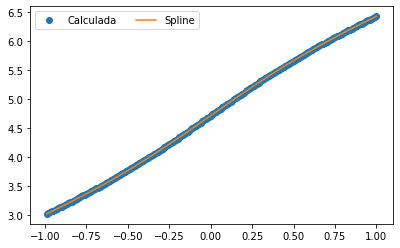

In [37]:
from practica_04 import solve_taylor
  
x, fx = solve_taylor(-1, 3, 0.01, 200)
""" https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html
"""
cs = CubicSpline(x, fx)
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(x, fx, 'o', label='Calculada')
ax.plot(x, cs(x), label="Spline")
ax.legend(loc='upper left', ncol=2)
plt.show()

# Ejercicio 2. 

### Implementar el Método Clásico de Ringe-Kuta de orden 4 para resolver la ecuación diferencial

\begin{cases}
   x^{\prime}(t) = f(t, x(t))\\
   x(t_0) = x_0
\end{cases}

### para una función f(t, x) cualquiera.

# Ejercicio 3

### Para la siguiente ecuación diferencial

\begin{cases}
   x^{\prime}(t) = t^{-2}(tx(t) - x(t)^{2})\\
   x(1) = 2
\end{cases}

### Resolver usando el método clásico de Runge Kuta de orden 4, con paso h = 0,005 , en el intervalo [1, 3]. 
### Graficar la solución usando Splines Cúbicos.

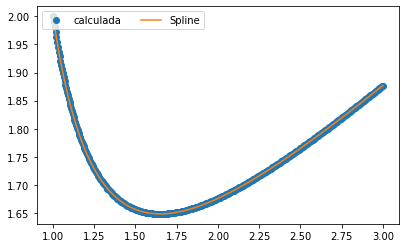

In [38]:
from practica_04 import ej3_f, runge_kuta_4

x, fx = runge_kuta_4(2, 1, 3, 0.005, ej3_f)

cs = CubicSpline(x, fx)
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(x, fx, 'o', label='calculada')
ax.plot(x, cs(x), label="Spline")
ax.legend(loc='upper left', ncol=2)
plt.show()

# Ejercicio 4. 

### Escribir un algoritmo para resolver la ecuación del calor con condiciones de borde homogéneas (igual a 0) usando el método implícito (usando backward difference para discretizar la derivada primera). 
### Usar este algoritmo para encontrar una solución aproximada de la siguiente ecuación diferencial

\begin{cases}
   u_{xx} = u_t & t \geq 0, x \in [0, 1]\\
   u(x,0) = sin(\pi x) & x \in [0, 1] \\
   u(0,t) = u(1,t) = 0 &  t \geq 0
\end{cases}

### Graficar la solución u.

### Utilizamos entonces la formula Backward Difference

$$u_t(x,t) \approx \frac{u(x,t) - u(x, t - k)}{k}$$
$$ k \in \mathbb{R}, k > 0$$

### Quedando como resultado la siguiente fórmula

$$U_{i, j-1} = -s \cdot U_{i-1, j} + (1+2s)\cdot U_{i, j} - s \cdot U_{i+1, j}$$

### Se debe notar entonces que representando el caso en forma $Ax = b$ nos queda por ejemplo que:

$$A \cdot U_1 = U_0$$

### Para lo cual, uno estaria tentado a realizar la operacion $A^{-1} \cdot U_0 = U_1$ lo cuál sería un error en términos de propagación de errores y costos en cálculos auxiliares. Por lo tanto es necesario resolver el sistema matricial e ir calculando de forma ascendente

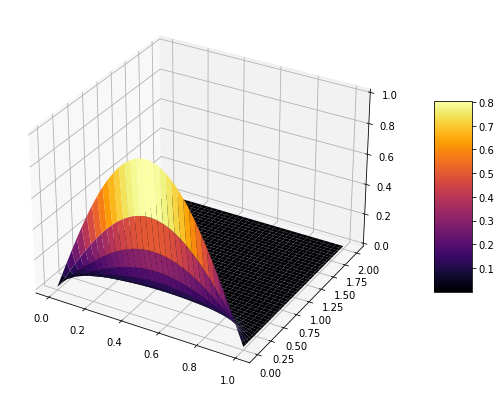

In [39]:
from practica_04 import ej4_f, solve_metodo_implicito_homogeneo

h = 0.01
k = 0.01
t_final = 2
U, X, T = solve_metodo_implicito_homogeneo(ej4_f, h, k, t_final)

""" https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html
    https://betterprogramming.pub/how-to-use-colormaps-with-matplotlib-to-create-colorful-plots-in-python-969b5a892f0c
"""
fig = plt.figure(figsize=(16.5, 7))
ax = fig.add_subplot(projection='3d')
X, T = np.meshgrid(X, T)
Z = np.array(U)
surf = ax.plot_surface(X, T, Z, cmap="inferno")
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()